In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from dnn_tau import Dnn_tau
from data_extractor import Data_extractor_v2, output_vars_v2
import os
import fnmatch
from utils import normalize, bucketize, split_dataset
from copy import deepcopy
import pickle
from metrics import *
import matplotlib.pyplot as plt

## Selection of features

In [2]:
import pickle
denom = 100

channels = ['tee', 'tem', 'tmm', 'tte', 'ttm']
selected_vars = []

for channel in channels:
    with open('saved_results/new_results/TEST9_global_v4_all_channels_loss_shuffle_'+channel, 'rb') as file:
        fi = pickle.load(file)
    sorted_fi = sorted(fi.items(), key=lambda x: x[1], reverse=True)
    names = [item[0] for item in sorted_fi]
    values = [item[1][0] for item in sorted_fi]

    print(names[0])
    threshold = max(values[1:])/denom

    sel_values = [v for v in values if v > threshold]
    sel_names = names[:len(sel_values)]

    selected_vars.extend(sel_names)
    print(sel_names)

selected_vars = list(set(selected_vars))
print(selected_vars)
print(len(selected_vars))

filename = f"saved_results/selected_vars_threshold_{denom}_bis"
with open(filename, "wb") as file:
    pickle.dump(selected_vars, file)

mass_hyp
['mass_hyp', 'HNL_CM_mass_1', 'HNL_CM_mass_2', 'Mt_tot', 'pt_123', 'mass_23', 'mt_1MET', 'mass_123', 'pt_MET', 'mt_3MET', 'mt_2MET', 'pt_1', 'mt_12', 'HNL_CM_mass_with_MET_1', 'mass_13', 'HNL_CM_mass_with_MET_2', 'pt_2', 'mt_2(13)', 'mt_13', 'mt_3(1MET)', 'mass_12', 'pt_3', 'mt_1(2MET)', 'mt_23', 'mt_MET(23)', 'mt_2(1MET)', 'mt_3(12)', 'mt_MET(12)', 'mt_1(23)', 'mt_1(3MET)', 'mt_MET(13)']
mass_hyp
['mass_hyp', 'HNL_CM_mass_1', 'HNL_CM_mass_2', 'mt_3MET', 'mt_1MET', 'mt_2MET', 'mass_13', 'Mt_tot', 'mt_MET(13)', 'mt_2(1MET)', 'mt_12', 'mass_123', 'pt_MET', 'pt_123', 'mass_23', 'pt_1', 'mt_13', 'mass_12', 'mt_1(23)', 'HNL_CM_mass_with_MET_1', 'mt_23']
mass_hyp
['mass_hyp', 'HNL_CM_mass_1', 'HNL_CM_mass_2', 'Mt_tot', 'mass_23', 'pt_123', 'mt_3MET', 'mt_1MET', 'mass_123', 'pt_MET', 'pt_1', 'mt_2MET', 'mt_12', 'HNL_CM_mass_with_MET_1', 'mass_13', 'pt_2', 'HNL_CM_mass_with_MET_2', 'mt_1(2MET)', 'mt_13', 'mt_1(3MET)', 'mt_MET(23)', 'mass_12', 'mt_2(13)', 'mt_23', 'pt_3', 'mt_3(1MET)',

In [69]:
import pickle
import pandas as pd

channels = ['tee', 'tem', 'tmm', 'tte', 'ttm']
filename = "saved_results/selected_vars_threshold_150"
# name = "saved_results/new_results/TEST9_global_v4_all_channels_loss_shuffle_"
# name = "TEST9_sel1_test_loss_shuffle_"
name = "saved_results/new_results/TEST9_sel2_loss_shuffle_"

with open(filename, "rb") as file:
    selected_vars = pickle.load(file)

fi_dict = {}

for channel in channels:
    with open(name+channel, 'rb') as file:
        fi = pickle.load(file)
    fi = {key: value[0] for key, value in fi.items()}
    print(fi)
    fi_dict[channel] = {key: fi[key] for key in selected_vars if key in fi}
    
sums = []
for i in range(len(fi_dict[channels[0]])):
    sums.append(0)
sum_of_fi = dict(zip(fi_dict[channels[0]].keys(),sums))
for j, key in enumerate(fi_dict[list(fi_dict.keys())[0]]):
    for channel in channels:
        sum_of_fi[key] += fi_dict[channel][key]
    
    
    for channel in channels:
        fi_dict[channel] = dict(sorted(fi_dict[channel].items(), key=lambda x: sum_of_fi[x[0]], reverse=True))

fi_df = pd.DataFrame(fi_dict)
print(len(fi_df))

{'mt_23': 0.006494969129562378, 'deltaphi_2(13)': 0.003057315945625305, 'mt_1(3MET)': 0.004293903708457947, 'deltaphi_2(3MET)': 0.0035449713468551636, 'pt_1': 0.008288726210594177, 'deltaphi_2(1MET)': 0.003986194729804993, 'mt_1(2MET)': 0.03767375648021698, 'mt_MET(23)': 0.001796036958694458, 'deltaphi_3(12)': 0.003379225730895996, 'mass_23': 0.07796309888362885, 'HNL_CM_mass_2': 0.16739898920059204, 'deltaphi_MET(23)': 0.005139946937561035, 'HNL_CM_mass_1': 0.2953774333000183, 'mass_13': 0.017961949110031128, 'mt_2MET': 0.0530274361371994, 'mt_3(12)': 0.015549853444099426, 'Mt_tot': 0.3118434250354767, 'HNL_CM_mass_with_MET_2': 0.002812430262565613, 'mt_2(1MET)': 0.010152995586395264, 'pt_123': 0.1172051727771759, 'mt_1MET': 0.06387798488140106, 'mt_3(2MET)': 0.006961345672607422, 'pt_2': 0.013174101710319519, 'mt_12': 0.016917794942855835, 'mt_13': 0.009706825017929077, 'mt_MET(12)': 0.004369497299194336, 'mt_2(3MET)': 0.010181784629821777, 'mass_hyp': 1.0171818137168884, 'pt_3': 0.0

In [70]:
for key in fi_df:
    fi_df[key] /= max(fi_df[key])

In [13]:
variable_symbols = {
    'charge_1'                      :   r"$\mathrm{Q^{\ell_1}}$",
    'charge_2'                      :   r"$\mathrm{Q^{\ell_2}}$",
    'charge_3'                      :   r"$\mathrm{Q^{\ell_3}}$",
    'pt_1'                          :   r"$\mathrm{p_T^{\ell_1}}$",
    'pt_2'                          :   r"$\mathrm{p_T^{\ell_2}}$",
    'pt_3'                          :   r"$\mathrm{p_T^{\ell_3}}$",
    'pt_MET'                        :   r"$\mathrm{p_T^{MET}}$",
    'eta_1'                         :   r"$\mathrm{\eta^{\ell_1}}$", 
    'eta_2'                         :   r"$\mathrm{\eta^{\ell_2}}$", 
    'eta_3'                         :   r"$\mathrm{\eta^{\ell_3}}$",
    'mass_1'                        :   r"$\mathrm{m^{\ell_1}}$", 
    'mass_2'                        :   r"$\mathrm{m^{\ell_2}}$", 
    'mass_3'                        :   r"$\mathrm{m^{\ell_3}}$", 
    'deltaphi_12'                   :   r"$\mathrm{\Delta\phi(\ell_1,\ell_2)}$",
    'deltaphi_13'                   :   r"$\mathrm{\Delta\phi(\ell_1,\ell_3)}$",
    'deltaphi_23'                   :   r"$\mathrm{\Delta\phi(\ell_2,\ell_3)}$",
    'deltaphi_1MET'                 :   r"$\mathrm{\Delta\phi(\ell_1,MET)}$",
    'deltaphi_2MET'                 :   r"$\mathrm{\Delta\phi(\ell_2,MET)}$",
    'deltaphi_3MET'                 :   r"$\mathrm{\Delta\phi(\ell_3,MET)}$",
    'deltaphi_1(23)'                :   r"$\mathrm{\Delta\phi(\ell_1, \ell_2+\ell_3)}$",
    'deltaphi_2(13)'                :   r"$\mathrm{\Delta\phi(\ell_2, \ell_1+\ell_3)}$",
    'deltaphi_3(12)'                :   r"$\mathrm{\Delta\phi(\ell_3, \ell_1+\ell_2)}$",
    'deltaphi_MET(12)'              :   r"$\mathrm{\Delta\phi(MET, \ell_1+\ell_2)}$",
    'deltaphi_MET(13)'              :   r"$\mathrm{\Delta\phi(MET, \ell_1+\ell_3)}$",
    'deltaphi_MET(23)'              :   r"$\mathrm{\Delta\phi(MET, \ell_2+\ell_3)}$",
    'deltaphi_1(2MET)'              :   r"$\mathrm{\Delta\phi(\ell_1, \ell_2+MET)}$",
    'deltaphi_1(3MET)'              :   r"$\mathrm{\Delta\phi(\ell_1, \ell_3+MET)}$",
    'deltaphi_2(1MET)'              :   r"$\mathrm{\Delta\phi(\ell_2, \ell_1+MET)}$",
    'deltaphi_2(3MET)'              :   r"$\mathrm{\Delta\phi(\ell_2, \ell_3+MET)}$",
    'deltaphi_3(1MET)'              :   r"$\mathrm{\Delta\phi(\ell_3, \ell_1+MET)}$",
    'deltaphi_3(2MET)'              :   r"$\mathrm{\Delta\phi(\ell_3, \ell_2+MET)}$",
    'deltaeta_12'                   :   r"$\mathrm{\Delta\eta(\ell_1, \ell_2)}$",
    'deltaeta_13'                   :   r"$\mathrm{\Delta\eta(\ell_1, \ell_3)}$",
    'deltaeta_23'                   :   r"$\mathrm{\Delta\eta(\ell_2, \ell_3)}$",
    'deltaeta_1(23)'                :   r"$\mathrm{\Delta\eta(\ell_1, \ell_2+\ell_3)}$",
    'deltaeta_2(13)'                :   r"$\mathrm{\Delta\eta(\ell_2, \ell_1+\ell_3)}$",
    'deltaeta_3(12)'                :   r"$\mathrm{\Delta\eta(\ell_3, \ell_1+\ell_2)}$",
    'deltaR_12'                     :   r"$\mathrm{\Delta R(\ell_1, \ell_2)}$",
    'deltaR_13'                     :   r"$\mathrm{\Delta R(\ell_1, \ell_3)}$",
    'deltaR_23'                     :   r"$\mathrm{\Delta R(\ell_2, \ell_3)}$",
    'deltaR_1(23)'                  :   r"$\mathrm{\Delta R(\ell_1, \ell_2+\ell_3)}$",
    'deltaR_2(13)'                  :   r"$\mathrm{\Delta R(\ell_2, \ell_1+\ell_3)}$",
    'deltaR_3(12)'                  :   r"$\mathrm{\Delta R(\ell_3, \ell_1+\ell_2)}$",
    'mt_12'                         :   r"$\mathrm{m_T(\ell_1, \ell_2)}$",
    'mt_13'                         :   r"$\mathrm{m_T(\ell_1, \ell_3)}$",
    'mt_23'                         :   r"$\mathrm{m_T(\ell_2, \ell_3)}$",
    'mt_1MET'                       :   r"$\mathrm{m_T(\ell_1, MET)}$",
    'mt_2MET'                       :   r"$\mathrm{m_T(\ell_2, MET)}$",
    'mt_3MET'                       :   r"$\mathrm{m_T(\ell_3, MET)}$",
    'mt_1(23)'                      :   r"$\mathrm{m_T(\ell_1, \ell_2+\ell_3)}$",
    'mt_2(13)'                      :   r"$\mathrm{m_T(\ell_2, \ell_1+\ell_3)}$",
    'mt_3(12)'                      :   r"$\mathrm{m_T(\ell_3, \ell_1+\ell_2)}$",
    'mt_MET(12)'                    :   r"$\mathrm{m_T(MET, \ell_1+\ell_2)}$",
    'mt_MET(13)'                    :   r"$\mathrm{m_T(MET, \ell_1+\ell_3)}$",
    'mt_MET(23)'                    :   r"$\mathrm{m_T(MET, \ell_2+\ell_3)}$",
    'mt_1(2MET)'                    :   r"$\mathrm{m_T(\ell_1, \ell_2+MET)}$",
    'mt_1(3MET)'                    :   r"$\mathrm{m_T(\ell_1, \ell_3+MET)}$",
    'mt_2(1MET)'                    :   r"$\mathrm{m_T(\ell_2, \ell_1+MET)}$",
    'mt_2(3MET)'                    :   r"$\mathrm{m_T(\ell_2, \ell_3+MET)}$",
    'mt_3(1MET)'                    :   r"$\mathrm{m_T(\ell_3, \ell_1+MET)}$",
    'mt_3(2MET)'                    :   r"$\mathrm{m_T(\ell_3, \ell_2+MET)}$",
    'mass_12'                       :   r"$\mathrm{m(\ell_1+\ell_2)}$",
    'mass_13'                       :   r"$\mathrm{m(\ell_1+\ell_3)}$",
    'mass_23'                       :   r"$\mathrm{m(\ell_2+\ell_3)}$",
    'mass_123'                      :   r"$\mathrm{m(\ell_1+\ell_2+\ell_3)}$",
    'Mt_tot'                        :   r"$\mathrm{M_T^{total}}$",
    'pt_123'                        :   r"$p_T\left(\sum_{x_i}P^{x_i}\right)$",
    'HNL_CM_angle_with_MET_1'       :   r"$\mathrm{\alpha_{HNL,1}$",
    'HNL_CM_angle_with_MET_2'       :   r"$\mathrm{\alpha_{HNL,2}$",
    'W_CM_angle_to_plane_1'         :   r"$\mathrm{\beta_{HNL,1}}$", 
    'W_CM_angle_to_plane_2'         :   r"$\mathrm{\beta_{HNL,2}}$", 
    'W_CM_angle_to_plane_with_MET_1':   r"$\mathrm{\tilde{\beta}_{HNL,1}}$", 
    'W_CM_angle_to_plane_with_MET_2':   r"$\mathrm{\tilde{\beta}_{HNL,2}}$",
    'HNL_CM_mass_1'                 :   r"$\mathrm{m_{HNL,1}}$",
    'HNL_CM_mass_2'                 :   r"$\mathrm{m_{HNL,2}}$",
    'HNL_CM_mass_with_MET_1'        :   r"$\mathrm{\tilde{m}_{HNL,1}}$",
    'HNL_CM_mass_with_MET_2'        :   r"$\mathrm{\tilde{m}_{HNL,2}}$",
    'W_CM_angle_12'                 :   r"$\mathrm{\gamma(\ell_1, \ell_2)}$",
    'W_CM_angle_13'                 :   r"$\mathrm{\gamma(\ell_1, \ell_3)}$", 
    'W_CM_angle_23'                 :   r"$\mathrm{\gamma(\ell_2, \ell_3)}$", 
    'W_CM_angle_1MET'               :   r"$\mathrm{\gamma(\ell_1, MET)}$", 
    'W_CM_angle_2MET'               :   r"$\mathrm{\gamma(\ell_2, MET)}$", 
    'W_CM_angle_3MET'               :   r"$\mathrm{\gamma(\ell_3, MET)}$",
    'mass_hyp'                      :   r"$\mathrm{m_{HNL}^{hyp}}$"
}

In [26]:
with open('extracted_data/variable_symbols', 'wb') as file:
    pickle.dump(variable_symbols, file)

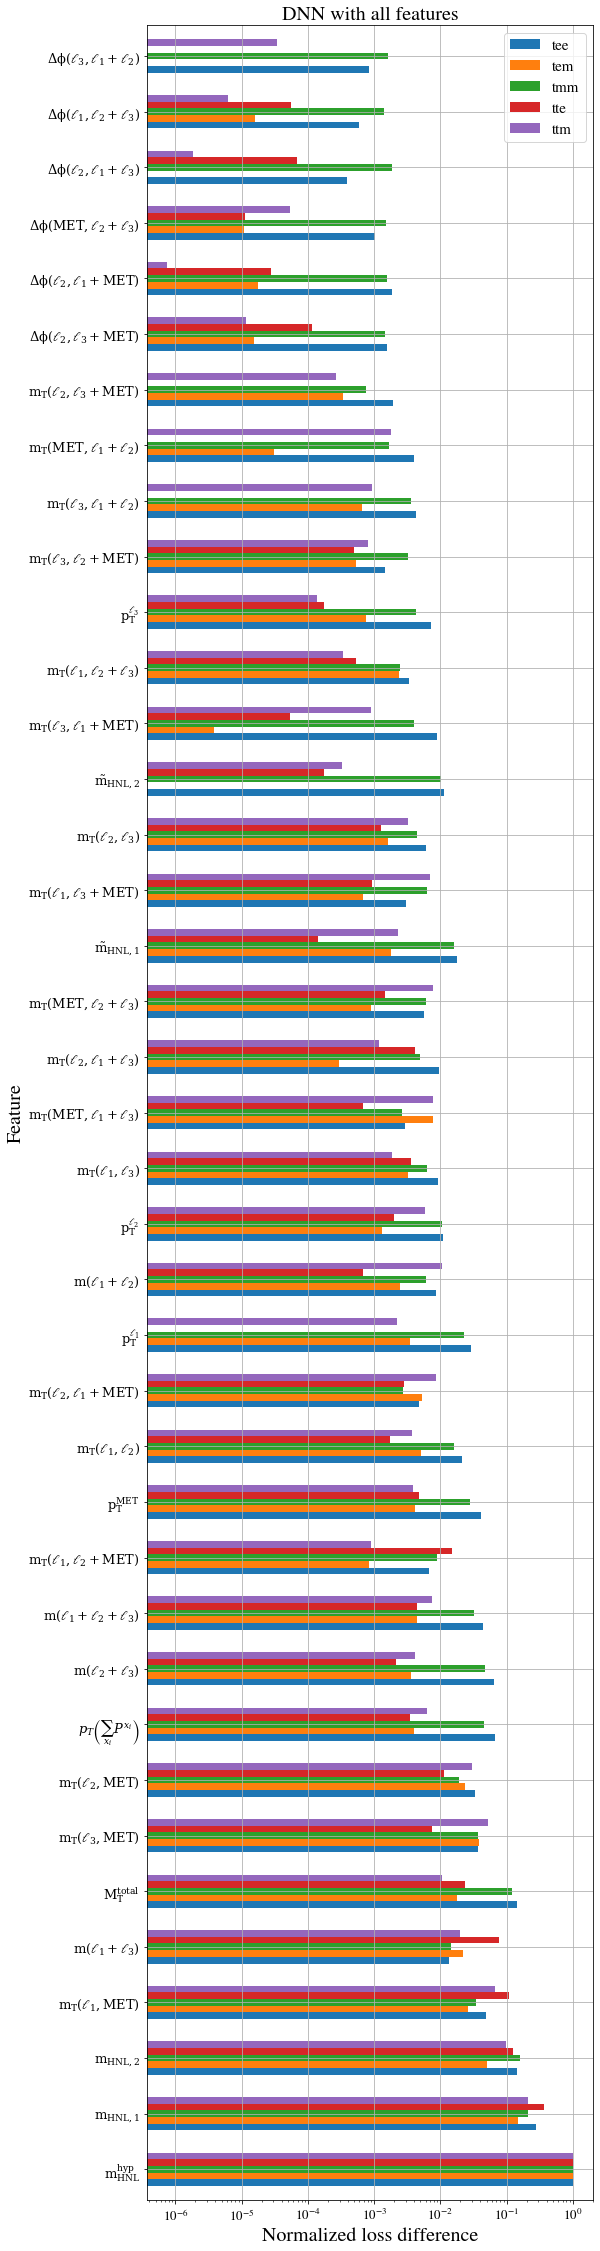

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({"font.size": 16, "font.family": "serif"})
plt.rcParams.update({'mathtext.fontset': 'stix'})
plt.rcParams.update({'font.family': 'STIXGeneral'})

feature_labels = []
for feature in fi_df.index:
    feature_labels.append(variable_symbols[feature])

fig, ax = plt.subplots(figsize=(8, 40))
fi_df.plot.barh(ax=ax, width=0.6)
ax.set_xlabel('Normalized loss difference', fontsize=20)
ax.set_ylabel('Feature', fontsize=20)
ax.set_yticklabels(feature_labels, math_fontfamily='dejavuserif')
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.grid()
ax.set_title('DNN with all features', fontsize=20)
# ax.set_title('DNN with 40 best features', fontsize=20)

for label in ax.get_yticklabels():
    label.set_fontsize(13)

# fig.savefig("Images/TEST9_global_v4_fi.pdf", bbox_inches = 'tight')
# fig.savefig("Images/TEST9_sel1_fi.pdf", bbox_inches = 'tight')
# fig.savefig("Images/TEST9_sel2_fi.pdf", bbox_inches = 'tight')

In [71]:
rel_var_channel = np.zeros((len(selected_vars),))
for i, key in enumerate(fi_df[channels[0]].keys()):
    fi_channel = np.array([fi_df[channel][key] for channel in channels])
    rel_var_channel[i] = np.var(fi_channel)/np.mean(fi_channel)

In [ ]:
rel_var_channel_global = rel_var_channel

In [72]:
rel_var_channel_sel = rel_var_channel

In [74]:
print(rel_var_channel_global)
print(rel_var_channel_sel)

[0.         0.02238961 0.01271052 0.01473504 0.01901745 0.05134812
 0.00623794 0.002532   0.02668662 0.02826897 0.01482179 0.00437449
 0.01428128 0.00623764 0.00096163 0.01313336 0.0023772  0.00278133
 0.00143295 0.00185736 0.00269574 0.0016655  0.00766486 0.00193739
 0.00096548 0.00619987 0.00420601 0.00076317 0.00314372 0.00081098
 0.00169108 0.00153955 0.00072951 0.00081939 0.00100596 0.00074423
 0.00111866 0.00071966 0.00087041]
[0.00000000e+00 1.55699209e-01 2.82952087e-02 1.05066234e-01
 8.38712418e-02 1.82685955e-02 5.67092139e-02 1.65872010e-03
 5.15973563e-03 7.22686931e-03 4.41293296e-02 6.52101619e-03
 8.57171202e-03 2.93709756e-02 6.98193358e-03 1.72866698e-04
 5.58265774e-04 1.37124257e-02 1.32221567e-04 1.25720567e-03
 5.07266038e-04 3.74886933e-04 8.25375457e-03 7.56504959e-03
 1.99655355e-03 5.47586725e-03 7.92268537e-04 6.82633699e-03
 1.26642855e-03 1.79866426e-03 2.69088607e-03 6.10357037e-04
 2.21896201e-03 2.42123827e-03 1.57896277e-03 2.49977660e-03
 3.20696085e-0

In [73]:
print(np.mean(rel_var_channel_global))
print(np.mean(rel_var_channel_sel))

0.007319909185649769
0.016111056462611753
